# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

In [ ]:
#Выводы будут прописаны через такую решетку.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [720]:
table_data = pd.read_csv('/Users/ilya/opt/table_data.csv')

In [721]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [722]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [723]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [724]:
np.random.seed(123)

In [725]:
le = LabelEncoder()
new_species = le.fit_transform(table_data.species)
#Создали столбец с закодированными видами листьев, ниже мы заменим его в нашей таблице.

In [726]:
table_data.species = new_species
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [501]:
# Это мы закодировали Species. Теперь создадим Х. Убедились сверху, что справа от спишес нужные нам столбцы.

In [942]:
X = table_data.iloc[:, 2:]
y = table_data.species

In [943]:
X.tail()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
985,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,0.001953,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930
989,0.023438,0.019531,0.031250,0.015625,0.005859,0.019531,0.035156,0.0,0.003906,0.039062,...,0.000000,0.000000,0.002930,0.000000,0.012695,0.000000,0.000000,0.023438,0.025391,0.022461


In [944]:
#Сделали переменную Х с нужными столбцами. Теперь разобьем выборку на тест и трейн, согласно условиям.

In [1015]:
sf = StratifiedShuffleSplit(n_splits = 2, test_size=0.3, random_state=123)
zagotovka_index, zagotovka2_index = sf.split(X, y)

In [ ]:
#Запишем список с индексами трейна и теста.

In [1095]:
train_idx = []
test_idx = []
s = zagotovka_index[0].tolist()
for m in s:
    train_idx.append(m)
g = zagotovka_index[1].tolist()
for i in g:
    test_idx.append(i)

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [946]:
# попробуем загрузить 1 изображение
img = plt.imread('/Users/ilya/opt/IMG/33.jpg')

(357, 700)


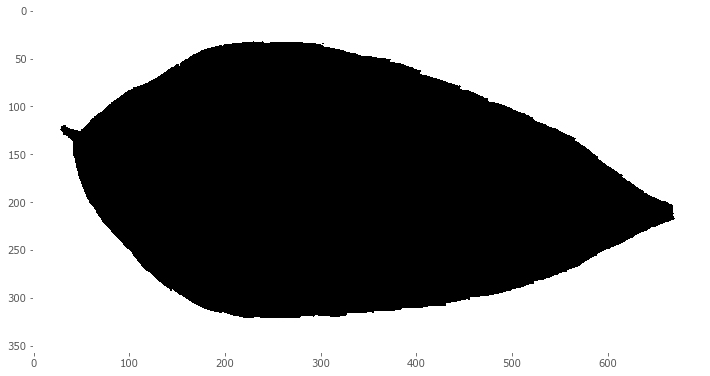

In [947]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [948]:
from skimage.transform import resize

In [949]:
img_resized = resize(img, (100, 100))

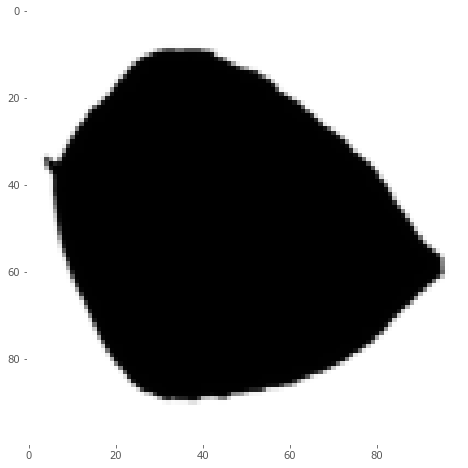

In [950]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только те картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [736]:
idis = table_data['id'].to_numpy() 

In [1079]:
datka = pd.DataFrame(np.zeros([990, 10000]))
i = 0
for s in range(1,1584):
    if s in idis: #ОТБИРАЕМ ТОЛЬКО НУЖНЫЕ НАМ КАРТИНКИ! Чтобы они соответствовали индексам которые у нас в таблице!
        img = plt.imread('/Users/ilya/opt/IMG/%s.jpg'%(i+1))
        img_resized = resize(img, (100, 100)) #сжимаем
        q = np.ravel(img_resized) #вытягиваем вектор
        datka.loc[i] = q
        i += 1

In [1080]:
datka['species'] = table_data.species
datka.tail()
#смотрим, что все норм

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,species
985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78
989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50


In [1085]:
datka['aidi'] = np.arange(990)
datka.tail()
#щас будем делить трейн и тест по индексам из шафл сплита

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,species,aidi
985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,985
986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,986
987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,987
988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78,988
989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,989


In [1096]:
pod_train = datka[datka['aidi'].isin(train_idx)].drop(columns = ['aidi'])
pod_train.shape
#получилось

(693, 10001)

In [1097]:
pod_test = datka[datka['aidi'].isin(test_idx)].drop(columns = ['aidi'])
pod_test.shape
#и тут получилось!

(297, 10001)

In [1108]:
imgs_train = pod_train.values[:, :-1]
imgs_test = pod_test.values[:, :-1]
imgs_y_train = pod_train.values[:, -1]
imgs_y_test = pod_test.values[:, -1]

imgs_OB = datka.drop(columns = ['aidi', 'species'])
imgs_OBSH = imgs_OB.values
# Итого мы разбили так, чтобы у нас совпадало с индексами в таблице!

imgs_train = pd.DataFrame(imgs_train)
imgs_test = pd.DataFrame(imgs_test)

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

In [1105]:
s = (table_data['species']).tolist()
k = pd.unique(table_data['species']).tolist()
ind = []
for i in range(0,99):
    ind.append(s.index(k[i]))
print(ind)
#Это чтобы уникальные листья были: выбираем какие-нибудь индексы уникальных листьев

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 37, 38, 39, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 60, 62, 63, 64, 65, 67, 71, 72, 74, 79, 80, 83, 84, 85, 86, 88, 89, 90, 92, 95, 98, 102, 103, 104, 111, 118, 120, 121, 122, 125, 127, 129, 131, 132, 151, 152, 156, 167, 172, 184, 194, 198, 201, 202, 203, 208, 222, 254, 262, 293, 320, 405, 412]


In [1106]:
len(ind) #действительно 99 уникальных листов

99

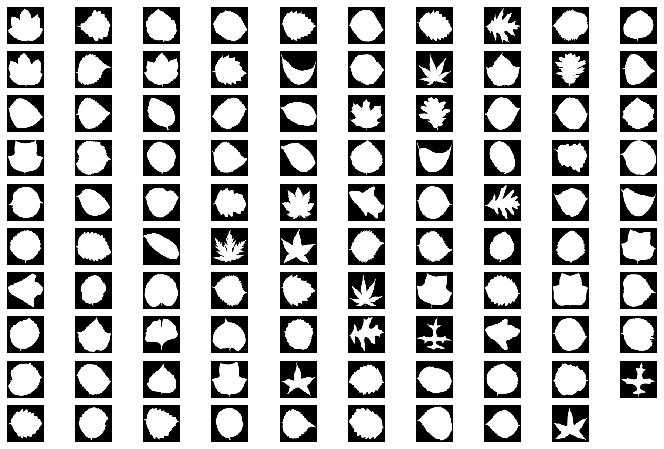

In [1109]:
image_shape = (100,100)
for i in range(1, 100):
    plt.subplot(10, 10, i) 
    plt.imshow(((imgs_train.iloc[i-1, :]).to_numpy()).reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off") 

In [ ]:
#Вот и 99 уникальных листьев.

In [1110]:
#ЗАДАНИЕ: Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей

In [1231]:
Z = np.random.choice(10000, size=100, replace=True, p=None)
Z #выбрали рандомные пиксели какие-нибудь

array([4389, 6001, 7224,  149, 9607, 2855, 1563, 9485, 7743, 7446, 4032,
       8945, 6322, 9005, 6565, 1342,  801, 9797,  394, 4729, 8503,  914,
       6466, 8187, 8424, 4492, 3063, 8624,  992, 7887, 3642, 2813, 4829,
       2187, 5155, 3187, 9058, 1872, 8767, 4279, 2118, 6092, 3462, 4793,
       4813, 9163, 4526, 4321, 5134, 7075,  652, 8638, 5463, 3558, 4480,
       8341, 3968, 6817, 9568,  789, 7560, 7221, 1920, 6428, 6462, 1032,
       2902, 1914,  342, 1413, 3687, 1447, 6125, 3086,  140, 1319, 5662,
       1082, 5025, 1053, 1324, 2110, 8907,  826, 6021, 5489, 4862, 2313,
       2208, 5354, 4730, 3742, 2997, 5067, 1156, 3306, 5423, 2406, 7120,
       8980])

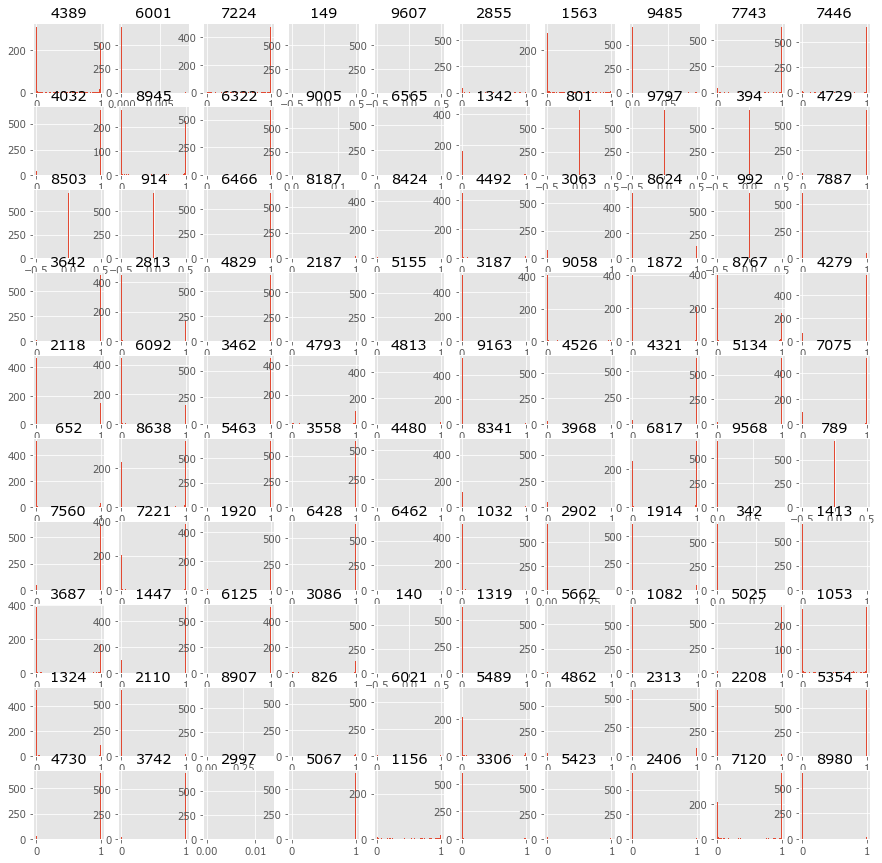

In [1232]:
plt.figure(figsize=(15,15))
for i in range(1, 101):
    k = int(Z[i-1])
    plt.subplot(10, 10, i) 
    plt.hist(imgs_train[k], bins=99)
    plt.title(k)
#На графике у нас в тайтле номер пикселя, и показывается распределение его значений на наших листах. 
#По вертикали - кол-во листьев, на которых именно такое значение Х этого пикселя. 

In [ ]:
#Как мы видим, наиболее популярные значения пикселей - это 0 и 1 (логично: белый и черный!)

(-0.5, 99.5, 99.5, -0.5)

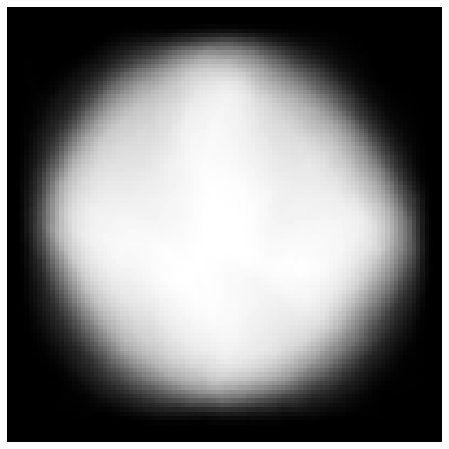

In [1112]:
#ЗАДАНИЕ: Нарисуйте 1 картинку - "средний лист". Затем нарисуйте еще 1 разброс каждого пикселя.
#Сейчас нарисуем средний лист
mean_face = imgs_train.mean(axis=0).to_numpy()
plt.imshow(mean_face.reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 

In [ ]:
#Вот такой средний лист - если вглядеться, и правда лист... Что-то есть.

Text(0.5, 1.0, 'Насколько отклоняется значение каждого пикселя от среднего')

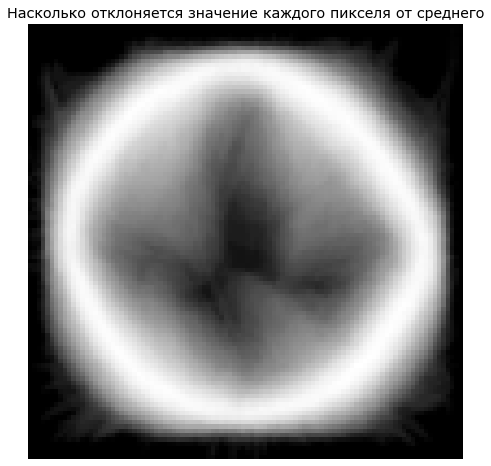

In [1113]:
#Рисуем стандартное отклонение
std_face = np.std(imgs_train, axis=0).to_numpy()
plt.imshow(std_face.reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 
plt.title('Насколько отклоняется значение каждого пикселя от среднего')

In [ ]:
#Тоже что-то похожее на лист кстати

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

In [ ]:
# 1) Листья разных классов можно различить визуально. Да, можно выделить группы похожих классов по форме

In [1194]:
#MIN MAX значения:
imgs_OBSH.min()

0.0

In [1195]:
imgs_OBSH.max()

1.0

In [ ]:
#Минимальное значение 0, максимальное - 1. (закрашен полностью или не закрашен совсем)

In [1215]:
dfr = pd.DataFrame(imgs_OBSH)

In [1222]:
dfr.mode(axis = 0).dropna()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#И по гистограмме, и по моде видим, наиболее популярные значения признаков - 0 и 1, закрашен и не закрашен. 
#Распределения разных признаков в основном похожи между собой, что логично - у нас чаще всего цвета белый и черный
#то есть закрашен пиксель или нет.

In [ ]:
#Да, мы можем спокойно бинаризовать изображение, ведь листья отличаются формой, а не цветом,
#разницу в форме можно передать и двумя цветами. Сильной потери информации при этом не будет.
#Бинаризовать лучше по порогу 0 и >0 - так мы сможем понять закрашивать клетку или нет.

In [ ]:
#Средний лист не особо похож на обычный, так как слишком много листов наслоилось друг на друга и получился
#своего рода круг, однако если наложить каждый лист на средний - мы не выйдем за рамки этого "круга"

In [ ]:
#Константными пикселями являются все граничные пиксели - они все закрашены. Их довольно много.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [1114]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 9)
k_means = k_means.fit(imgs_OBSH)
clusters = k_means.predict(imgs_OBSH)

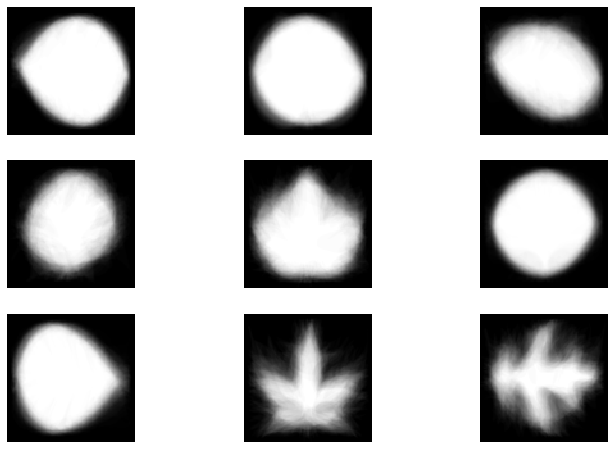

In [1115]:
centroids = k_means.cluster_centers_
image_shape = (100,100)
for i in range(1, 10):
    plt.subplot(3, 3, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off") 

In [ ]:
#Кластеризация не очень, на листья похожи от силы 4 класса, остальное - невнятные круги: мало классов!

In [1116]:
## ДЛЯ 25 кластеров
k_means = KMeans(n_clusters = 25)
k_means = k_means.fit(imgs_OBSH)
clusters = k_means.predict(imgs_OBSH)

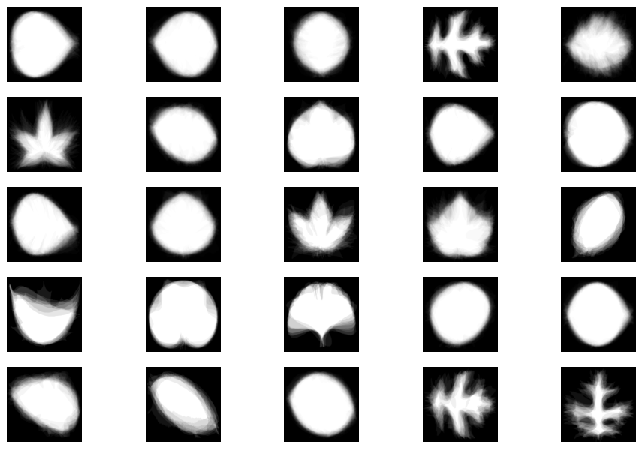

In [1117]:
centroids = k_means.cluster_centers_
image_shape = (100,100)
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off") 

In [ ]:
#Эта кластеризация уже лучше, однако классов все равно мало - невнятные похожие круги все же есть.

In [1118]:
## ДЛЯ 100 кластеров
k_means = KMeans(n_clusters = 100)
k_means = k_means.fit(imgs_OBSH)
clusters = k_means.predict(imgs_OBSH)

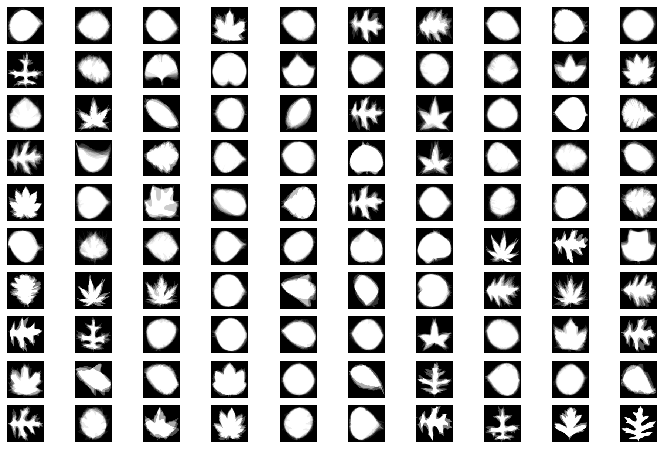

In [1119]:
centroids = k_means.cluster_centers_
image_shape = (100,100)
for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off") 

In [ ]:
#Здесь мы уже можем отличить классы. Метод сработал вполне норм, однако все равно много чересчур похожих центроидов.

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

In [ ]:
#1) Чем больше классов, тем больше похожи их центры на листья.

In [ ]:
#2) Отличия от картинок листьев в четкости границ - у центроидов они размытые.
#Это связано с тем, что в центроидах мы берем среднее изображение, то есть "наслаиваем" листья одного класса
#друг на друга.

In [ ]:
#3) Да, среди кластеров есть много похожих листьев, это опять же связано с "наслоением"

In [ ]:
#4) Лучше всего для нашей задачи иметь 99 кластеров - по количеству настоящих классов листьев.
# Если б мы не знали этого, то эмпирически выбрали бы 100 классов: тут центроиды листьев более-менее 
# вменяемы и не смешиваются в кашу.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [852]:
#ПЕРВЫЙ КЛАССИФИКАТОР

In [1120]:
from sklearn.neighbors import NearestCentroid
NC = NearestCentroid()
NC.fit(imgs_train, imgs_y_train)
NCpredict = NC.predict(imgs_test)

In [1121]:
from sklearn.metrics import accuracy_score
accuracy_score(imgs_y_test, NCpredict)

0.003367003367003367

In [ ]:
# Качество маловато....

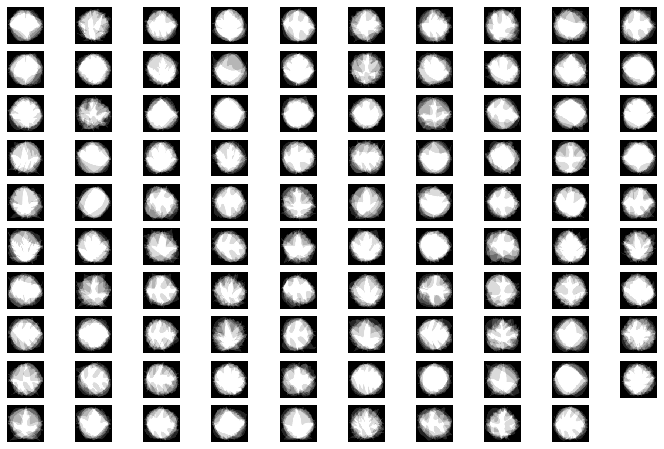

In [1122]:
centroids = NC.centroids_
image_shape = (100,100)
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off")

In [ ]:
#Что-то от листьев есть, однако чересчур много шумов!

In [ ]:
### Второй классификатор.

In [1123]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(imgs_train, imgs_y_train)
MNBpredict = MNB.predict(imgs_test)
accuracy_score(imgs_y_test, MNBpredict)

0.006734006734006734

In [ ]:
# Качесво все еще стремное, но уже получше!

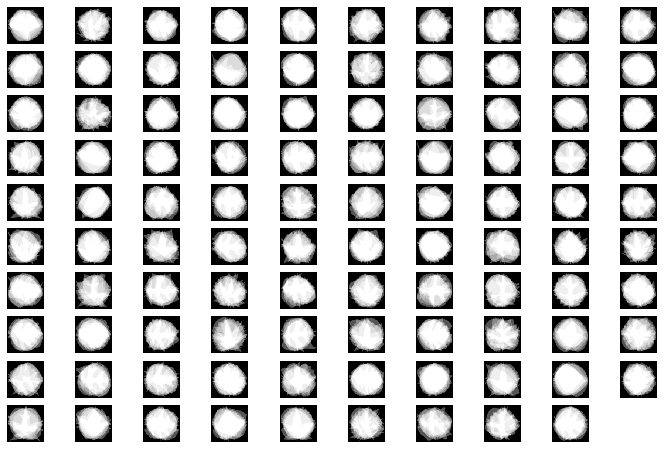

In [1124]:
centroids = MNB.feature_log_prob_
image_shape = (100,100)
for i in range(1, 100):
    plt.subplot(10, 10, i) 
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off")
#Визуализированные вероятности

In [ ]:
# Здесь шумов так же очень и очень много, хотя человеческому глазу листья и правда тут видны лучше, чем на 1 примере.

In [1125]:
###ТРЕТИЙ
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state = 123, solver = 'sag')
LG.fit(imgs_train, imgs_y_train)
LGpredict = LG.predict(imgs_test)
accuracy_score(imgs_y_test, LGpredict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.003367003367003367

In [ ]:
# Качество тоже не ахти, такое же, как у Nearest Centroid

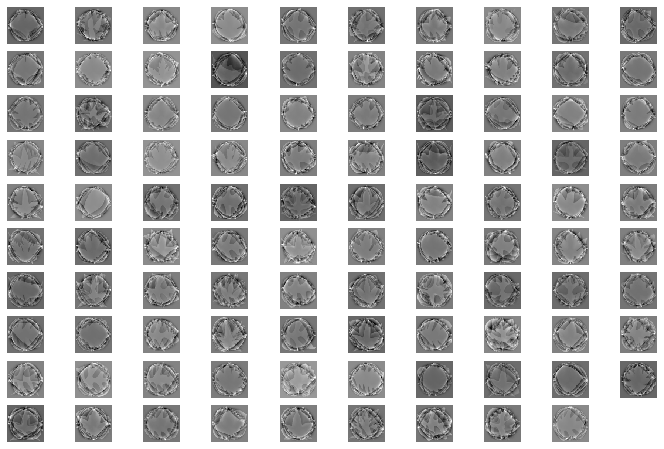

In [1126]:
centroids = LG.coef_
image_shape = (100,100)
for i in range(1, 100):
    plt.subplot(10, 10, i) 
    plt.imshow(centroids[i-1, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.axis("off")

In [ ]:
# На картинках важность пикселей, где ярче - там пиксели важнее. Тут наверное мы смотрим не сами листья,
# а их границы.

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

In [ ]:
#1) Лучше всего работает наивный баесовский классификатор. Предположу, что это связано с тем, что каждое распреде-
#ление значений пикселя оценивается независимо, а поэтому у нас смягчатся проклятия размерности (из-за огромного)
#числа признаков.
#2) В центрах кластеров можно разглядеть немного очертаний листьев, но с огромными шумами, опять же что
# мешает классификатору потом качественно распознать такой класс. Из-за шумов снова образуются эти
# невнятные круги "наслоения", перекрывающие все.
# Визуализированные вероятности немного больше похожи на листья, но абсолютно те же проблемы.
# Веса похожи не на листья, а на их границы (контур).
#3) Я думаю, что это связано с тем, что для определения класса листа в итоге будут более важны не внутренности,
# которые у каждого листа одинаково белые, а как раз границы, которые различаются и дают своеобразность
# какому-либо классу, поэтому они имеют больший вес в модели.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [1233]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=123, bootstrap = True)
RF.fit(imgs_train, imgs_y_train)
RFpredict = RF.predict(imgs_test)
accuracy_score(imgs_y_test, RFpredict)

0.020202020202020204

In [ ]:
# Случайный лес показал качество лучше, чем наши прошлые модели.

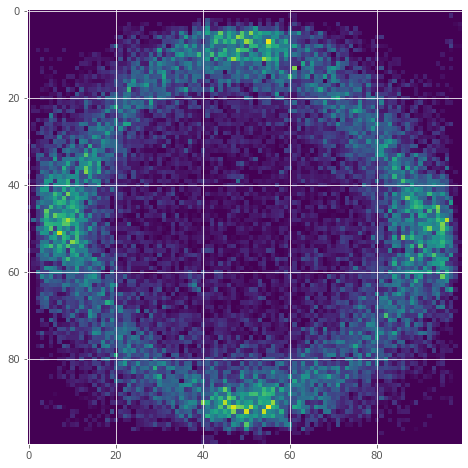

In [1235]:
feat = RF.feature_importances_
image_shape = (100,100)
plt.imshow(feat.reshape(image_shape), interpolation='none')

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

In [0]:
#1)Эта картинка уже точно не похожа на изображение листа.
#2)Однако лес выделяет из важного опять же границы, так что здравый смысл изображение имеет.
# Мы определяем форму листа скорее по его контуру, ну и внутренности лес тоже выделил как важные.
# При этом границу всего рисунка, которая у всех одинаковая он выделилил неважным.
# Ну, конечно он выделил это все неидеально, но с натяжкой можно так сказать. (Для такого accuracy пойдет :D) 

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [1129]:
num_components = 2**np.arange(10)
#попробуем уменьшить число признаков вот до такого

In [1178]:
quality_test = []
quality_train = []
from sklearn.decomposition import PCA
for num in num_components:
    dec = PCA(n_components = num, random_state = 123)
    new_model = dec.fit_transform(imgs_OBSH)
    new_model = pd.DataFrame(new_model) #столбец со сжатыми признаками.
    new_model['aidi'] = np.arange(990)
    new_train = new_model[new_model['aidi'].isin(train_idx)].drop(columns = ['aidi']) #чтобы не сбился трейн, тест
    new_test = new_model[new_model['aidi'].isin(test_idx)].drop(columns = ['aidi'])
    RF.fit(new_train, imgs_y_train)
    RFpredict_train = RF.predict(new_train)
    RFpredict_test = RF.predict(new_test)
    quality_train.append(accuracy_score(imgs_y_train, RFpredict_train))
    quality_test.append(accuracy_score(imgs_y_test, RFpredict_test))

In [1179]:
quality_test #качество на контрольной выборке

[0.006734006734006734,
 0.006734006734006734,
 0.006734006734006734,
 0.010101010101010102,
 0.010101010101010102,
 0.006734006734006734,
 0.010101010101010102,
 0.0,
 0.006734006734006734,
 0.003367003367003367]

In [1172]:
quality_train #качество на обучении

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [1184]:
quality_ishodniye_priznaki = np.full([10, 1], 0.020202020202020204) #исходное качество без сжатия

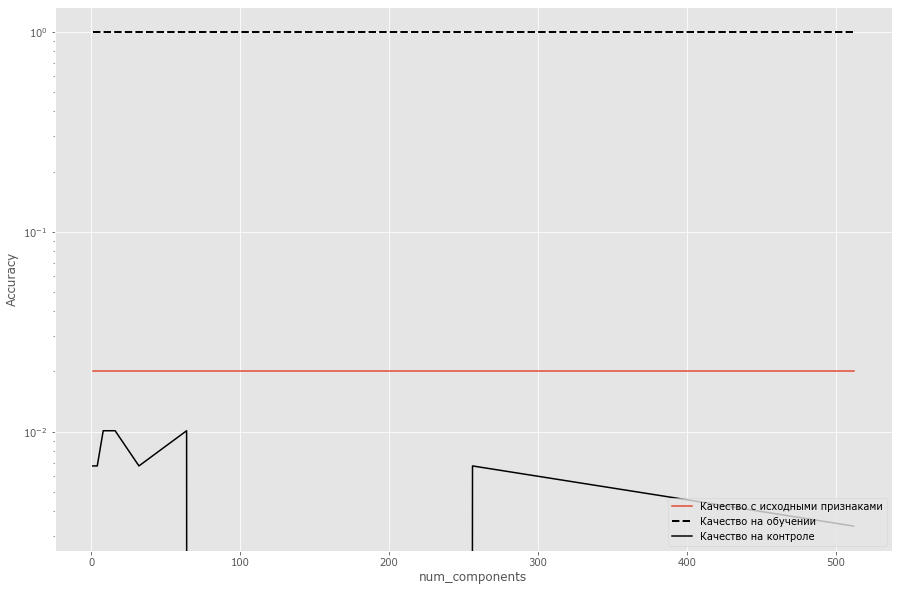

In [1192]:
plt.figure(figsize=(15,10))
plt.plot(num_components, quality_ishodniye_priznaki,  label="Качество с исходными признаками")
plt.plot(num_components, quality_train, "k--", linewidth=2, label="Качество на обучении")
#поэтому не видно на графике
plt.plot(num_components, quality_test, "k-", label="Качество на контроле")
plt.yscale("log")
plt.xlabel("num_components")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Оптимальное число признаков для РСА = 16. Далее нет смысла набирать их больше - качество падает.
#При этом при сжатии мы теряем в качестве почти  в два раза.

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

In [0]:
#1) С ростом числа признаков у нас падает качество, поэтому да, лес переобучается, хотя на тестовой
#выборке у нас всегда хорошее кач-во.
#2) Максимальное кач-во на контроле при 16 компонентах. Далее нет смысла набирать их больше.
#Это значение отличается в два раза.

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [1243]:
#То же делаем, чтобы выборки совпадали с тем что в начале мы сплитили. Чтобы одинаково во всех моделях было.
table_data['idis'] = np.arange(990)
pod_train = table_data[table_data['idis'].isin(train_idx)].drop(columns = ['idis'])
pod_test = table_data[table_data['idis'].isin(test_idx)].drop(columns = ['idis'])

X_train = pod_train.values[:, 2:]
X_test = pod_test.values[:, 2:]
y_train = pod_train.species
y_test = pod_test.species

RF.fit(X_train, y_train)
RFpredict = RF.predict(X_test)
accuracy_score(y_test, RFpredict)

0.9764309764309764

In [ ]:
#Качество изменилось ОЧЕНЬ сильно. Вероятно, качество признаков в таблице намного лучше, чем просто попиксельное
#описание картинки. Плюс признаков сильно меньше - нет проклятия размерности. Мы не переобучаемся.

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [1249]:
#Подберем самые крутые признаки.
from sklearn.model_selection import RandomizedSearchCV
distributions = {'bootstrap': [True, False],
               'max_depth': [50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 3, 5],
               'n_estimators': [130, 180, 230]}
GSCV = RandomizedSearchCV(RF, distributions, scoring = 'accuracy', cv = 4)
GSCV.fit(X_train, y_train)
GSCV.best_params_

{'n_estimators': 180,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [1250]:
CoolRF = RandomForestClassifier(n_estimators = 180, min_samples_split = 3, min_samples_leaf = 2, max_features = 'auto', max_depth = 70, bootstrap = True, random_state=123)
CoolRF.fit(X_train, y_train)
CoolRFpredict = CoolRF.predict(X_test)
accuracy_score(y_test, CoolRFpredict)

0.9797979797979798

In [1140]:
# Качество улучшилось!! Что логично, раз мы подбирали лучшие параметры.

In [1251]:
testovaya = pd.DataFrame()
realnaya = pd.DataFrame()
testovaya['PREDICTION'] = CoolRFpredict
realnaya['REALITY'] = y_test
testovaya.index = realnaya.index
testovaya['REALITY'] = realnaya['REALITY']
testovaya

,PREDICTION,REALITY
1,49,49
4,84,84
8,53,53
13,50,50
14,58,58
...,...,...
977,75,75
978,14,14
980,79,81
981,97,97


In [ ]:
# Найдем, где наша модель промахивается. И нарисуем примеры что она выдала, и как оно было в реале.

In [1252]:
oshibki = testovaya[(testovaya['PREDICTION']) != (testovaya['REALITY'])]
oshibki

,PREDICTION,REALITY
21,31,84
30,40,36
331,92,73
547,39,40
980,79,81
985,39,40


In [1253]:
#Ищем какие-нибудь картинки с классами 31 и 40.
datka[(datka['species'] == 31)].head(1)

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,species,aidi
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,15


In [1254]:
datka[(datka['species'] == 40)].head(1)

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,species,aidi
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,5


(-0.5, 99.5, 99.5, -0.5)

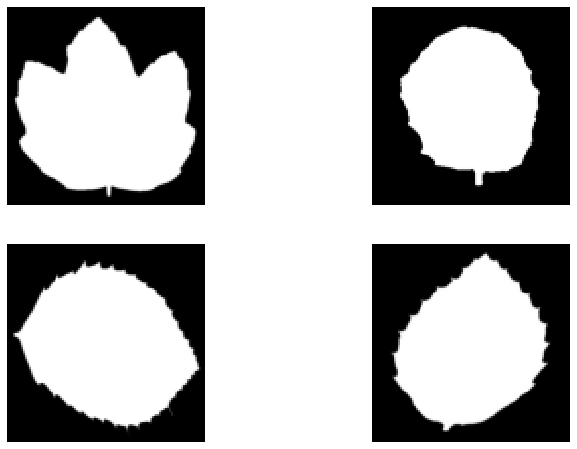

In [1257]:
image_shape = (100,100)
# Слева предсказание - справа реальность
# Картинка 21 предсказание
plt.subplot(2, 2, 1)
plt.imshow(((pd.DataFrame(imgs_OBSH).loc[15]).to_numpy()).reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 
# Картинка 21 реальность
plt.subplot(2, 2, 2)
plt.imshow(((pd.DataFrame(imgs_OBSH).loc[21]).to_numpy()).reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 
# Картинка 30 пресказание
plt.subplot(2, 2, 3)
plt.imshow(((pd.DataFrame(imgs_OBSH).loc[5]).to_numpy()).reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 
# Картинка 30 реальность
plt.subplot(2, 2, 4)
plt.imshow(((pd.DataFrame(imgs_OBSH).loc[30]).to_numpy()).reshape(image_shape), interpolation='none', cmap='gray')
plt.axis("off") 

In [ ]:
# Картинки чем-то похожи. Поэтому понятно, почему наш лес ошибается.